# OSを確認する

In [ ]:
!uname

Linux


# CPUを確認する

In [ ]:
!arch

x86_64


# インストールディレクトリを初期化する

In [1]:
%cd /content

/content


In [ ]:
!pwd

/content


In [ ]:
!rm -rf hakoniwa-px4sim/

# hakoniwa-px4simをcloneする

In [2]:
!git clone --recursive https://github.com/toppers/hakoniwa-px4sim.git

Cloning into 'hakoniwa-px4sim'...
remote: Enumerating objects: 1520, done.
remote: Counting objects: 100% (399/399), done.
remote: Compressing objects: 100% (273/273), done.
remote: Total 1520 (delta 195), reused 206 (delta 82), pack-reused 1121
Receiving objects: 100% (1520/1520), 6.11 MiB | 10.13 MiB/s, done.
Resolving deltas: 100% (756/756), done.
Submodule 'hakoniwa/third-party/c_library_v2' (https://github.com/mavlink/c_library_v2.git) registered for path 'hakoniwa/third-party/c_library_v2'
Submodule 'hakoniwa/third-party/glm' (https://github.com/g-truc/glm.git) registered for path 'hakoniwa/third-party/glm'
Submodule 'hakoniwa/third-party/hakoniwa-core-cpp-client' (https://github.com/toppers/hakoniwa-core-cpp-client.git) registered for path 'hakoniwa/third-party/hakoniwa-core-cpp-client'
Submodule 'hakoniwa/third-party/hakoniwa-python-simasset-plugin' (https://github.com/toppers/hakoniwa-python-simasset-plugin.git) registered for path 'hakoniwa/third-party/hakoniwa-python-simasse

# 箱庭コア機能をインストールする

In [3]:
%cd /content/hakoniwa-px4sim/hakoniwa/third-party/hakoniwa-core-cpp-client/

/content/hakoniwa-px4sim/hakoniwa/third-party/hakoniwa-core-cpp-client


In [4]:
!bash build.bash

-- The C compiler identification is GNU 11.4.0
-- The CXX compiler identification is GNU 11.4.0
-- Detecting C compiler ABI info
-- Detecting C compiler ABI info - done
-- Check for working C compiler: /usr/bin/cc - skipped
-- Detecting C compile features
-- Detecting C compile features - done
-- Detecting CXX compiler ABI info
-- Detecting CXX compiler ABI info - done
-- Check for working CXX compiler: /usr/bin/c++ - skipped
-- Detecting CXX compile features
-- Detecting CXX compile features - done
-- BUILD_TYPErelease
-- GCOVdisabled
-- BUILD_TYPErelease
-- GCOVdisabled
-- OS_TYPE=posix
-- Found Python: /usr/local/bin/python (found version "3.10.12") found components: Interpreter Development Development.Module Development.Embed 
-- CMAKE_VERSION:3.27.7
-- PYTHON_INCLUDE_DIRS:
-- Python_INCLUDE_DIRS:/usr/include/python3.10
-- PYTHON_LIBRARIES:
-- Python_LIBRARIES:/usr/lib/x86_64-linux-gnu/libpython3.10.so
-- Python_LIBRARY_DIRS:/usr/lib/x86_64-linux-gnu
-- OS_TYPE=posix
-- Configuring

In [5]:
!mkdir /usr/local/lib/hakoniwa

In [6]:
!mkdir /usr/local/bin/hakoniwa

In [7]:
!bash install.bash

# 箱庭ドローンシミュレータをインストールする

In [8]:
%cd /content/hakoniwa-px4sim/hakoniwa

/content/hakoniwa-px4sim/hakoniwa


In [9]:
!/bin/bash build.bash

-- The C compiler identification is GNU 11.4.0
-- The CXX compiler identification is GNU 11.4.0
-- Detecting C compiler ABI info
-- Detecting C compiler ABI info - done
-- Check for working C compiler: /usr/bin/cc - skipped
-- Detecting C compile features
-- Detecting C compile features - done
-- Detecting CXX compiler ABI info
-- Detecting CXX compiler ABI info - done
-- Check for working CXX compiler: /usr/bin/c++ - skipped
-- Detecting CXX compile features
-- Detecting CXX compile features - done
-- HAKO_CLIENT_OPTION_FILEPATH/content/hakoniwa-px4sim/hakoniwa/cmake-build/../linux-cmake-options.cmake
-- BUILD_TYPErelease
-- GCOVdisabled
-- BUILD_TYPErelease
-- GCOVdisabled
-- BUILD_TYPErelease
-- GCOVdisabled
-- OS_TYPE=posix
-- Found Python: /usr/local/bin/python (found version "3.10.12") found components: Interpreter Development Development.Module Development.Embed 
-- CMAKE_VERSION:3.27.7
-- PYTHON_INCLUDE_DIRS:
-- Python_INCLUDE_DIRS:/usr/include/python3.10
-- PYTHON_LIBRARIES:
-

In [10]:
!pip install -r python/requirements.txt

# シミュレーションを実行する

In [15]:
!bash python/run_c++.bash 30 2> err.log

INFO: Simulatin start
HAKO_CAPTURE_SAVE_FILEPATH : ./capture.bin
HAKO_BYPASS_IPADDR : 127.0.0.1
HAKO_CUSTOM_JSON_PATH : ./config/custom_c++.json
HAKO_BYPASS_PORTNO : 54001
INFO: shmget() key=255 size=1129352 
INFO: hako_master_init() success
Robot: DroneAvator, PduWriter: DroneAvator_drone_motor
channel_id: 0 pdu_size: 88
INFO: DroneAvator create_lchannel: logical_id=0 real_id=0 size=88
Robot: DroneAvator, PduWriter: DroneAvator_drone_pos
channel_id: 1 pdu_size: 48
INFO: DroneAvator create_lchannel: logical_id=1 real_id=1 size=48
Robot: DroneAvator, PduWriter: DroneAvator_drone_ctrl
channel_id: 2 pdu_size: 48
INFO: DroneAvator create_lchannel: logical_id=2 real_id=2 size=48
WAIT START
INFO: START SIMULATION
start
wait 30 sec
WAIT RUNNING
START CREATE PDU DATA: total_size= 184
INFO: shmget() key=256 size=184 
PDU DATA CREATED
CREATED ADDR=0x7a9eb77d200c
PDU CREATED
INFO: setup start
INFO: setup done
INFO: start simulation
SYNC MODE: true
Robot: DroneAvator, PduWriter: DroneAvator_drone_

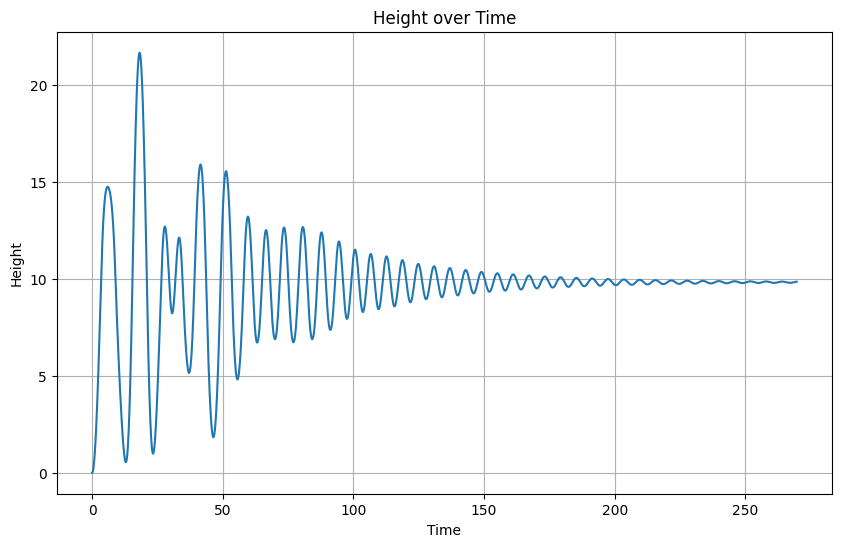

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# CSVファイルの読み込み
df = pd.read_csv('python/results/height_data.csv')

# グラフの描画
plt.figure(figsize=(10, 6))  # グラフのサイズ指定
plt.plot(df['Time'], df['Height'])  # 時間に対する高さをプロット
plt.title('Height over Time')  # グラフのタイトル
plt.xlabel('Time')  # x軸のラベル
plt.ylabel('Height')  # y軸のラベル
plt.grid(True)  # グリッドの表示
plt.show()  # グラフの表示
